In [1]:
%matplotlib inline

from spectral_cube import SpectralCube
from radio_beam import Beam
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import aplpy
import pickle
from config import *

In [2]:
file_250um='fits_files/Per_west_SPIRE_250.fits'
file_850um='fits_files/PerseusWest_20170815_850_DR3_ext_HK.fits'

### Different scale plots 

Herschel: Barnard 1

In [3]:
if False:
    label_col = 'white'
    star_col = 'black'

    fig_i = aplpy.FITSFigure( file_250um, figsize=(4,5), hdu=1)
    fig_i.show_colorscale(vmin=0, vmax=40, cmap='inferno', stretch='asinh')
    # Colorbar 
    fig_i.add_colorbar()
    fig_i.colorbar.set_axis_label_text('Flux Density (Jy beam$^{-1}$)')
    fig_i.colorbar.set_ticks([0, 5, 20, 40])
    # Recenter
    fig_i.set_system_latex(True)
    fig_i.ticks.set_color(label_col)
    fig_i.recenter(53.131958, 31.040908, width=0.65, height=0.725)
    fig_i.set_nan_color('0.9')
    # Beam
    fig_i.add_beam( color=label_col, major=17.9/60./60., minor=17.9/60./60., angle=0.0)
    fig_i.beam.set_major(17.9 * u.arcsec)
    fig_i.beam.set_minor(17.9 * u.arcsec)
    # Scale bar
    ang_size = (0.5*(u.pc).to(u.au)/distance)*u.arcsec
    fig_i.add_scalebar( ang_size, label='0.5 pc', color=label_col)
    # Tickmarks
    fig_i.tick_labels.set_xformat('hh:mm')
    fig_i.tick_labels.set_yformat('dd:mm')
    fig_i.ticks.set_length(9)
    # Axis labels
    fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
    fig_i.axis_labels.set_ytext('Declination (J2000)')
    # text
    y0_text = 0.825
    x0_text = 0.8
    dy_text = 0.075
    fig_i.add_label( x0_text, y0_text, r'Barnard 1', color='white', relative=True, size=14, weight=60, horizontalalignment='center')
    fig_i.add_label( x0_text, y0_text - dy_text, r'Herschel', color='white', relative=True, size=14, weight=60, horizontalalignment='center')
    fig_i.add_label( x0_text, y0_text - 2*dy_text, r'250$\mu$m', color='white', relative=True, size=14, weight=60, horizontalalignment='center')
    #
#     fig_i.savefig('figures/Per-emb-2-Herschel.pdf')
    #
    fig_i.show_rectangles(53.075, 30.8299, 90*(u.arcsec).to(u.deg), 90*(u.arcsec).to(u.deg), color='white')
    fig_i.savefig('figures/Per-emb-2-Herschel_box.pdf')

SCUBA-2 850um: Core

In [4]:
if False:
    label_col = 'white'
    star_col = 'black'

    fig_i = aplpy.FITSFigure( file_850um, figsize=(4,4), hdu=0)
    fig_i.show_colorscale(vmin=0, vmax=8, cmap='inferno', stretch='asinh')
    # Colorbar
    fig_i.add_colorbar()
    fig_i.colorbar.set_axis_label_text('Flux Density (Jy beam$^{-1}$)')
    fig_i.colorbar.set_ticks([0, 1, 4, 8])
    # Recenter
    fig_i.set_system_latex(True)
    fig_i.ticks.set_color(label_col)
    fig_i.recenter( 53.075, 30.8299, radius=45*(u.arcsec).to(u.deg))
    fig_i.set_nan_color('0.9')
    # Beam
    fig_i.add_beam( color=label_col, major=14.6/60./60., minor=14.6/60./60., angle=0.0)
    fig_i.beam.set_major(14.6 * u.arcsec)
    fig_i.beam.set_minor(14.6 * u.arcsec)
    # Scale bar
    ang_size = (3e3/distance)*u.arcsec
    fig_i.add_scalebar( ang_size, label='3,000 au', color=label_col)
    # Tickmarks
    fig_i.tick_labels.set_xformat('hh:mm:ss')
    fig_i.tick_labels.set_yformat('dd:mm:ss')
    fig_i.ticks.set_length(9)
    # Axis labels
    fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
    fig_i.axis_labels.set_ytext('Declination (J2000)')
    y0_text = 0.90
    x0_text = 0.22
    dy_text = 0.075
    fig_i.add_label( x0_text, y0_text, r'Per-emb-2', color='white', relative=True, size=12, weight=60, horizontalalignment='center')
    fig_i.add_label( x0_text, y0_text - dy_text, r'SCUBA-2', color='white', relative=True, size=12, weight=60, horizontalalignment='center')
    fig_i.add_label( x0_text, y0_text - 2*dy_text, r'850$\mu$m', color='white', relative=True, size=12, weight=60, horizontalalignment='center')
    plt.tight_layout()

#     fig_i.savefig('figures/Per-emb-2-SCUBA2-850um.pdf', dpi=50)

    fig_i.show_contour(ALMA_cont, levels=[1], colors='black')
    fig_i.show_rectangles( 53.07475*u.deg, 30.8299*u.deg, (5*u.arcsec).to(u.deg), (5*u.arcsec).to(u.deg), color='DodgerBlue')
    fig_i.savefig('figures/Per-emb-2-SCUBA2-850um_with_box_contour.pdf', dpi=50)

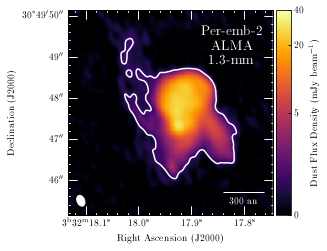

In [5]:
label_col = 'white'
star_col = 'black'

fig_i = aplpy.FITSFigure(ALMA_cont, figsize=(4,4))
fig_i.show_colorscale(vmin=0, vmax=40, cmap='inferno', stretch='asinh')
fig_i.show_contour(ALMA_cont, levels=[1], colors='white')
# Colorbar
fig_i.add_colorbar()
fig_i.colorbar.set_axis_label_text(r'Dust Flux Density (mJy beam$^{-1}$)')
fig_i.colorbar.set_ticks([0, 5, 20, 40])
# Recenter
fig_i.set_system_latex(True)
fig_i.ticks.set_color(label_col)
fig_i.recenter(ra_ALMA_zoom, dec_ALMA_zoom, radius=radius_ALMA_zoom.value)
fig_i.set_nan_color('0.9')
# Beam
fig_i.add_beam(color=label_col)
# Scale bar
ang_size = (3e2/distance)*u.arcsec
fig_i.add_scalebar( ang_size, label='300 au', color=label_col)
# Tickmarks
fig_i.tick_labels.set_xformat('hh:mm:ss.s')
fig_i.tick_labels.set_yformat('dd:mm:ss')
fig_i.ticks.set_length(9)
# Axis labels
fig_i.axis_labels.set_xtext(r'Right Ascension (J2000)')
fig_i.axis_labels.set_ytext(r'Declination (J2000)')
# text
y0_text = 0.9
x0_text = 0.8
dy_text = 0.075
fig_i.add_label( x0_text, y0_text, r'Per-emb-2', color='white', relative=True, size=14, weight=60, horizontalalignment='center')
fig_i.add_label( x0_text, y0_text - dy_text, r'ALMA', color='white', relative=True, size=14, weight=60, horizontalalignment='center')
fig_i.add_label( x0_text, y0_text - 2*dy_text, r'1.3-mm', color='white', relative=True, size=14, weight=60, horizontalalignment='center')
#
fig_i.savefig('figures/Per-emb-2-1300um_ALMA.pdf', dpi=120)

### NOEMA results 

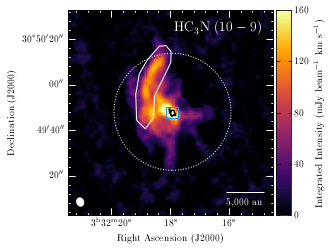

In [16]:
# convert file into mJy on-the-fly
fig = aplpy.FITSFigure(convert_into_mili(HC3N_TdV_10_9), figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=160., cmap='inferno')
# setup and colorbar
setup_plot_noema(fig, label_col='white', star_col='black')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'Integrated Intensity (mJy beam$^{-1}$ km s$^{-1}$)')
fig.colorbar.set_ticks([0, 40, 80, 120, 160])
# 
fig.add_label(0.95,0.91, r'HC$_3$N ($10-9$)', color='white',
               relative=True, size=14, weight=60, horizontalalignment='right')
#
fig.hide_layer('star')
fig.show_contour(ALMA_cont, levels=[1], colors='black')
fig.show_rectangles(ra_ALMA_zoom, dec_ALMA_zoom, 2*radius_ALMA_zoom, 2*radius_ALMA_zoom, color='DodgerBlue')
# with NOEMA PB
fig.show_regions(region_file_white)
freq_HC5N_10_9 = fits.getheader(HC3N_TdV_10_9)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema( freq_HC5N_10_9).to(u.deg)*0.5, ls=':', color='white')
fig.savefig('figures/Per-emb-2-HC3N_TdV_white_with_box_contour_PB.pdf', dpi=120)

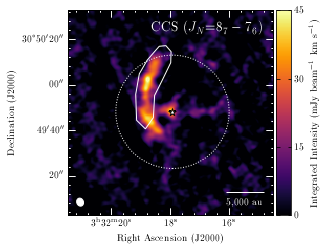

In [15]:
fig = aplpy.FITSFigure(CCS_TdV, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=45., cmap='inferno')
setup_plot_noema(fig, label_col='white', star_col='black')
fig.add_colorbar()
#
fig.add_label(0.95, 0.91, r'CCS ($J_N$=$8_7-7_6$)', color='white',
              relative=True, size=14, weight=60, horizontalalignment='right')
fig.colorbar.set_axis_label_text(r'Integrated Intensity (mJy beam$^{-1}$ km s$^{-1}$)')
fig.colorbar.set_ticks([0, 15, 30, 45])
# with PB
fig.show_regions(region_file_white)
freq_CCS = fits.getheader(CCS_TdV)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_CCS).to(u.deg)*0.5, ls=':', color='white')
fig.savefig('figures/Per-emb-2-CCS_TdV_box_contour_PB.pdf', dpi=120)

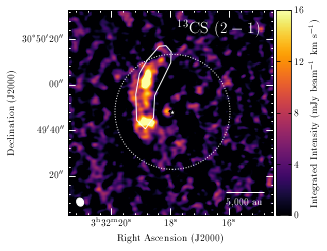

In [17]:
fig = aplpy.FITSFigure(CS_TdV, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=16., cmap='inferno')
setup_plot_noema(fig, label_col='white', star_col='black')
fig.add_colorbar()
fig.add_label(0.95,0.91, r"$^{13}$CS ($2-1$)", color='white',
              relative=True, size=16, weight=60, horizontalalignment='right')
fig.colorbar.set_axis_label_text(r"Integrated Intensity (mJy beam$^{-1}$ km s$^{-1}$)")
fig.colorbar.set_ticks([0, 4, 8, 12, 16])
# with PB
fig.show_regions(region_file_white)
freq_13CS = fits.getheader(CS_TdV)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_13CS).to(u.deg)*0.5, ls=':', color='white')
fig.savefig('figures/Per-emb-2-13CS_TdV_box_contour_PB.pdf', dpi=120)

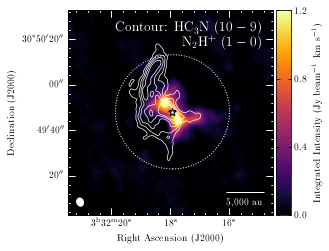

In [10]:
fig = aplpy.FITSFigure(N2Hp_TdV, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=1.2, cmap='inferno')
setup_plot_noema(fig, label_col='white', star_col='black')
fig.add_colorbar()
fig.add_label(0.95,0.838, r'N$_2$H$^+$ ($1-0$)', color='white',
               relative=True, size=14, weight=60, horizontalalignment='right')
fig.add_label(0.95,0.91, r'Contour: HC$_3$N ($10-9$)', color='white',
               relative=True, size=14, weight=60, horizontalalignment='right')
fig.colorbar.set_axis_label_text(r'Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')
# 
fig.show_contour(HC3N_TdV_10_9, levels=HC3N_10_9_levels, colors='white', linewidths=0.7)
fig.colorbar.set_ticks([0.0, 0.4, 0.8, 1.2])
# with PB
freq_N2Hp = fits.getheader(N2Hp_TdV)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_N2Hp).to(u.deg)*0.5, ls=':', color='white')
fig.savefig('figures/Per-emb-2-N2Hp_TdV_box_contour_PB.pdf', dpi=120)

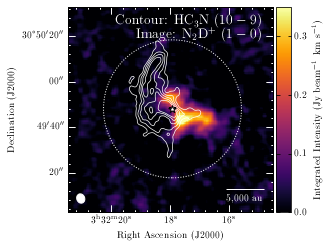

In [9]:
fig = aplpy.FITSFigure(N2Dp_TdV, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=0.35, cmap='inferno')
setup_plot_noema(fig, label_col='white', star_col='black')
fig.add_colorbar()
fig.add_label(0.95,0.86, r"Image: N$_2$D$^+$ ($1-0$)", color='white',
               relative=True, size=14, weight=60, horizontalalignment='right')
fig.add_label(0.95,0.925, r"Contour: HC$_3$N ($10-9$)", color='white',
               relative=True, size=14, weight=60, horizontalalignment='right')
fig.colorbar.set_axis_label_text(r'Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')

fig.show_contour(HC3N_TdV_10_9, levels=HC3N_10_9_levels, colors='white', linewidths=0.7)
fig.colorbar.set_ticks([0.0, 0.1, 0.2, 0.3])
# with PB
freq_N2Dp = fits.getheader(N2Dp_TdV)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_N2Dp).to(u.deg)*0.5, ls=':', color='white')
fig.savefig('figures/Per-emb-2-N2Dp_TdV_box_contour_PB.pdf', dpi=120)

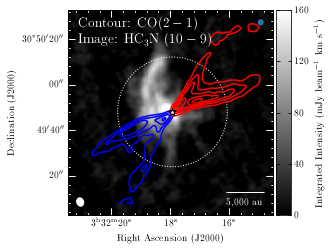

In [13]:
# Get data into mJy on-the-fly
fig = aplpy.FITSFigure(convert_into_mili(HC3N_TdV_10_9), figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=160., cmap='gray')
setup_plot_noema(fig, label_col='white', star_col='black')
#
fig.show_contour(file_12CO_blue, levels=CO_blue_levs, colors='blue')
fig.show_contour(file_12CO_red, levels=CO_red_levs, colors='red')
# 
hd_sma = fits.getheader(file_12CO_red)
fig.add_beam()
fig.beam[1].set_major(hd_sma['bmaj'])  # degrees
fig.beam[1].set_minor(hd_sma['bmin'])  # degrees
fig.beam[1].set_angle(hd_sma['bpa'])  # degrees
fig.beam[1].set_corner('top right')
#
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'Integrated Intensity (mJy beam$^{-1}$ km s$^{-1}$)')
fig.colorbar.set_ticks([0, 40, 80, 120, 160])
#
fig.add_label(0.05, 0.85, r"Image: HC$_3$N ($10-9$)", color='white',
               relative=True, size=14, weight=60, horizontalalignment='left')
fig.add_label(0.05, 0.935, r"Contour: CO($2-1$)", color='white',
               relative=True, size=14, weight=60, horizontalalignment='left')
# with PB
freq_12CO_2_1 = fits.getheader(file_12CO_red)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_sma(freq_12CO_2_1).to(u.deg)*0.5, ls=':', color='white')
fig.savefig('figures/Per-emb-2-HC3N_TdV_Outflows_box_contour_PB.pdf', dpi=120)

### Display best fit results: Velocity dispersion and centroid velocity 

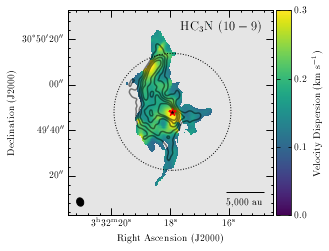

In [18]:
fig = aplpy.FITSFigure(HC3N_dv_10_9, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=0.3, cmap='viridis')
setup_plot_noema(fig, label_col='black', star_col='red')
fig.show_contour(HC3N_TdV_10_9, levels=HC3N_10_9_levels, colors='k', alpha=0.5)
fig.add_label(0.95, 0.91, r'HC$_3$N ($10-9$)', color='black',
              relative=True, size=13, weight=60, horizontalalignment='right')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'Velocity Dispersion (km s$^{-1}$)')
fig.colorbar.set_ticks([0.0, 0.1, 0.2, 0.3])
# with PB
freq_HC3N_10_9 = fits.getheader(HC3N_TdV_10_9)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_HC3N_10_9).to(u.deg)*0.5, ls=':', color='black')
fig.savefig('figures/Per-emb-2-HC3N_10-9_Sigma_v_box_contour_PB.pdf', dpi=120)

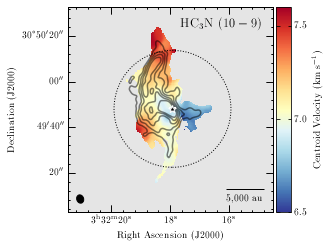

In [19]:
fig = aplpy.FITSFigure(HC3N_Vc_10_9, figsize=(4,4))
fig.show_colorscale(vmin=6.5, vmax=7.6, cmap='RdYlBu_r')
setup_plot_noema(fig, label_col='black', star_col='white')
fig.show_contour(HC3N_TdV_10_9, levels=HC3N_10_9_levels, colors='k', alpha=0.5)
fig.add_label(0.95, 0.91, r'HC$_3$N ($10-9$)', color='black',
               relative=True, size=13, weight=60, horizontalalignment='right')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r"Centroid Velocity (km s$^{-1}$)")
fig.colorbar.set_ticks([6.5, 7.0, 7.5])
# with PB
freq_HC3N_10_9 = fits.getheader(HC3N_TdV_10_9)['RESTFREQ'] * u.Hz
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_HC3N_10_9).to(u.deg)*0.5, ls=':', color='black')
fig.savefig('figures/Per-emb-2-HC3N_10-9_Vc_box_contour_PB.pdf', dpi=120)

In [15]:
pickle_in = open(stream_pickle, "rb")
fil = pickle.load(pickle_in)

pickle_in_2 = open(vlsr_rad_kde_pickle, "rb")
kde_v = pickle.load(pickle_in_2)

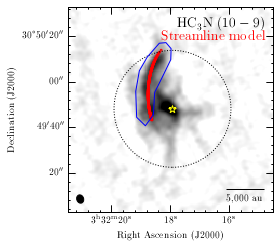

In [16]:
# Get data into mJy on-the-fly
fig = aplpy.FITSFigure(convert_into_mili(HC3N_TdV_10_9), figsize=(4,4))
fig.show_grayscale(vmin=0, vmax=160., invert=True)
setup_plot_noema(fig, label_col='black', star_col='yellow')
fig.show_regions(region_file)
# add streamline model
fig.show_markers(fil['ra'], fil['dec'], marker='o', color='red', s=3)
# Add PB and labels
freq_HC5N_10_9 = fits.getheader(HC3N_TdV_10_9)['RESTFREQ'] * u.Hz
fig.add_label(0.75, 0.91, r'HC$_3$N ($10-9$)', color='black',
              relative=True, size=14, weight=60)
fig.add_label(0.71, 0.85, r'Streamline model', color='red',
              relative=True, size=14, weight=60)
#
fig.show_circles(ra_Per2, dec_Per2, pb_noema(freq_HC5N_10_9).to(u.deg)*0.5,
                 ls=':', color='black')
fig.add_colorbar(axis_label_text=r'Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)',
                   ticks=[0, 0.05, 0.1, 0.15])
fig.colorbar.hide()
fig.savefig('figures/Per-emb-2_HC3N_10-9_TdV_streamline.pdf', dpi=120)


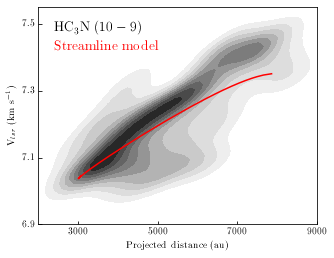

In [17]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_xlabel('Projected distance (au)')
ax.set_ylabel(r"V$_{lsr}$ (km s$^{-1}$)")
# 'radius':xx, 'v_lsr':yy, 'dens'
ax.contourf(kde_v['radius'], kde_v['v_lsr'], kde_v['dens'], cmap='Greys', 
            levels=np.arange(0.1, 1.2, 0.1), vmin=0., vmax=1.1)
ax.plot(fil['d_sky_au'], fil['vlsr'], color='red')
ax.xaxis.set_ticks(np.arange(3e3, 12e3, 2e3))
ax.yaxis.set_ticks(np.arange(6.9, 7.6, 0.2))
ax.set_ylim(6.9, 7.55)
ax.set_xlim(2.0e3, 9e3)
ax.text(2400, 7.47, r"HC$_3$N ($10-9$)", size=14, weight=60)
ax.text(2400, 7.42, r"Streamline model", color='red', size=14, weight=60)
fig.savefig('figures/Per-emb-2_HC3N_10-9_Vlsr_streamline.pdf', bbox_inches='tight', dpi=120)

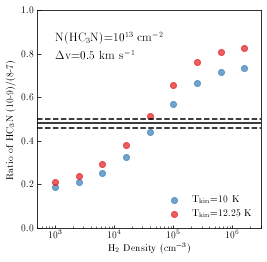

In [2]:
from astropy.table import Table
t13 = Table.read('data/N13.0_8-7_10-9.dat', format='ascii')
n_N13 = 10**(t13['log10(dens)'])
T_N13 = t13['Tkin']
r_N13 = 1./t13['ratio']
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plot_ratios(ax, n_N13, r_N13, T_N13, N_col=13, label_i=r'N(HC$_3$N)=10$^{13}$ cm$^{-2}$')
fig.savefig('figures/Per-emb-2_HC3N_Ratio_N13.pdf', bbox_inches='tight')

The average abundance of the streamer is calculated as the average column density of HC$_3$N, the average H$_2$ density, and the streamer's width (4500 au):

In [25]:
np.around((2.0e13*u.cm**-2) / ((4e4*u.cm**-3 * (15*300*u.au) ).to(u.cm**-2)), decimals=10)

<Quantity 7.4e-09>